In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
tt = pd.read_csv('Krish- Python Crash Course\\titanic_train.csv')

In [7]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
##handling missing values
tt.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


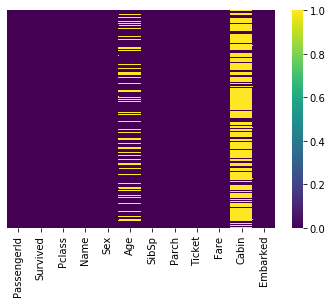

In [9]:
sns.heatmap(tt.isnull(),yticklabels=False,cmap='viridis')

In [21]:
tt['Age'].isnull().value_counts()

False    714
True     177
Name: Age, dtype: int64

### Observation
Roughly 20 percent of the Age data is missing. The proportion of Age missing is likely small enough for reasonable replacement with some form of imputation. Looking at the Cabin column, it looks like we are just missing too much of that data to do something useful with at a basic level. We'll probably drop this later, or change it to another feature like "Cabin Known: 1 or 0"

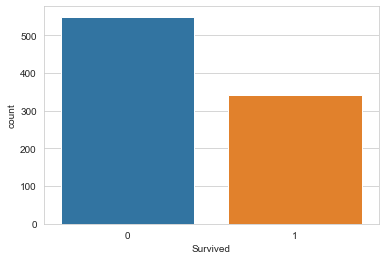

In [156]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tt)

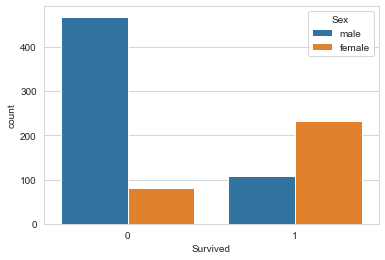

In [157]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=tt)

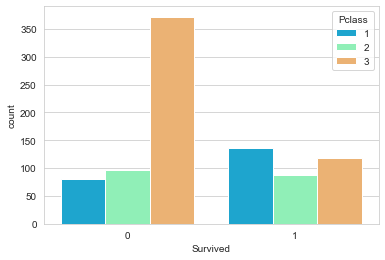

In [159]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=tt,hue='Pclass',palette='rainbow')

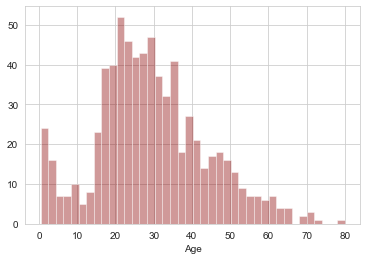

In [160]:
sns.distplot(tt['Age'].dropna(),kde=False,color='darkred',bins=40)
#dropna() since, earlier we saw that around 20% of age data is missing
#kde=False , kde is generally used in making probability density func
#bin=40, this'll show tatal 40 bars plotted from 0 to 80 i.e 1bar shown 2 age mettics

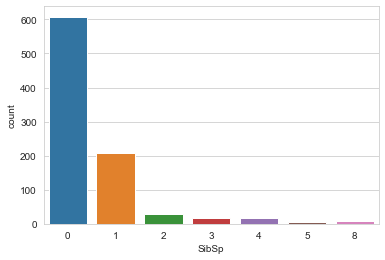

In [161]:
sns.countplot(x='SibSp',data=tt)

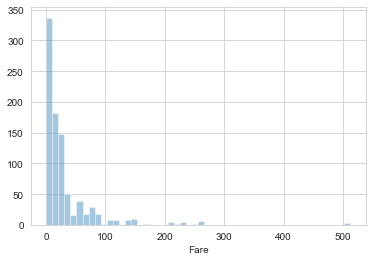

In [162]:
sns.distplot(tt['Fare'],kde=False)

In [27]:
tt

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [38]:
tt['Age'].mean() #return a float
tt.mean() #returns a seies

PassengerId    446.000000
Survived         0.383838
Pclass           2.308642
Age             29.699118
SibSp            0.523008
Parch            0.381594
Fare            32.204208
dtype: float64

### Data Cleansing

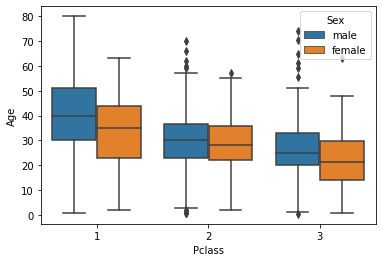

In [22]:
sns.boxplot(x='Pclass',y='Age',hue='Sex',data=tt)

In [164]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass == 1:
            return 37
        
        elif Pclass == 2 :
            return 29
        
        else:
            return 24
    else:
        return Age

In [165]:
tt['Age'] = tt[['Age','Pclass']].apply(impute_age,axis=1)
#axis=0 -- apply function to each column
#axis=1 -- apply func to each rcord(i.e Row)

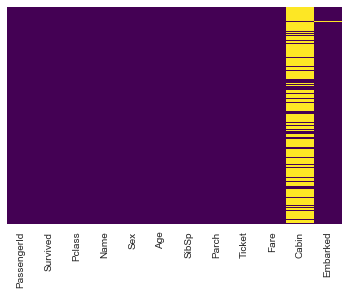

In [166]:
sns.heatmap(tt.isnull(),cmap='viridis',yticklabels=False,cbar=False)

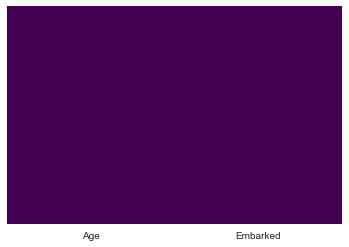

In [167]:
##in above case there is an extta heat line got rendered in Embarked Column we can cross check it as below

sns.heatmap(tt[['Age','Embarked']].isnull(),yticklabels=False,cbar=False,cmap='viridis')


In [170]:
tt = tt.drop('Cabin',axis=1)

In [171]:
tt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


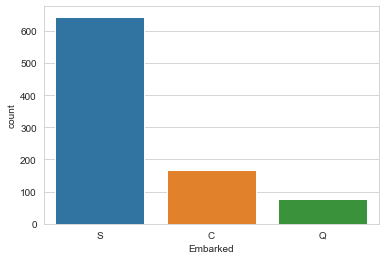

In [172]:
sns.countplot(x='Embarked',data=tt)

In [173]:
tt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [175]:
pd.get_dummies(tt['Embarked'],drop_first=True).head()
## drop_first is done becouse Embarked column doesnt need to have any null values so q,s(0,0) represents c=1 


,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [178]:
pd.get_dummies(tt['Sex'],drop_first=True).head()
## similarly only one column is suficient i.e if male-0 that means sex is Female

,male
0,1
1,0
2,0
3,0
4,1


In [179]:
embarked = pd.get_dummies(tt['Embarked'],drop_first=True)
sex = pd.get_dummies(tt['Sex'],drop_first=True)

In [180]:
tt = tt.drop(['Name','Sex','Embarked','Ticket'],axis=1)

In [182]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


In [183]:
tt = pd.concat([tt,sex,embarked],axis=1)

In [184]:
tt.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [201]:
tt_y = tt['Survived']
tt_y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [194]:
tt_X = tt.drop(['Survived'],axis=1)
tt_X.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,3,22.0,1,0,7.2500,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0
2,3,3,26.0,0,0,7.9250,0,0,1
3,4,1,35.0,1,0,53.1000,0,0,1
4,5,3,35.0,0,0,8.0500,1,0,1


In [193]:
from sklearn.model_selection import train_test_split 

In [202]:
X_tr, X_tst, y_tr, y_tst = train_test_split(tt_X,
                                           tt_y, test_size = 0.30, 
                                           random_state=101)

## or in place of tt_X, tt_y we can directly  give 
"""train_test_split(tt.drop(['Survived'],axis=1), 
                                tt[['Survived']], 
                                test_size = 0.30, random_state=101)"""

"train_test_split(tt.drop(['Survived'],axis=1), \n                                tt[['Survived']], \n                                test_size = 0.30, random_state=101)"

In [198]:
from sklearn.linear_model import LogisticRegression

In [205]:
logmod = LogisticRegression()

In [206]:
logmod.fit(X_tr, y_tr)

C:\Users\chpra\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [213]:
predict = logmod.predict(X_tst)


In [216]:
from sklearn.metrics import accuracy_score

In [218]:
accuracy=accuracy_score(y_tst,predict)
accuracy

0.7686567164179104

In [ ]:
mean()